<a href="https://colab.research.google.com/github/GalangSuryaputra/Pedjoeang-Data-Sains/blob/main/EDA_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?id=1-CkViCEe_aRWGzvLqCu15w3VMXbDQfsF
)


# Pendahuluan

### Import Library

In [ ]:
import pandas as pd                           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Mengakses dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/GalangSuryaputra/Pedjoeang-Data-Sains/main/titanic_modify.csv')
df.head() 

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Tujuan analisis data 
Melakukan klasifikasi penumpang yang selamat dan tidak selamat pada kasus tenggelamnya kapal Titanic.

### Memahami dataset

Dataset Titanic dibuat untuk membuat machine learning untuk melakukan klasifikasi biner(Selamat atau Tidak Selamat. Variabel-variabel yang terdapat pada dataset ini adalah sebagai berikut:
1. **PassengerId** = Nomor Id Penumpang 
2. **Survived** = Keterangan Selamat(0=Tidak, 1=Ya)
3. **Pclass** = Kelas Tiket (1=Kelas 1, 2=Kelas 2, dst)
4. **Name** = Nama Penumpang
5. **Sex** = Jenis kelamin
6. **Age** = Usia dalam tahun
7. **SibSp** = Jumlah saudara kandung / pasangan di kapal Titanic
8. **Parch** = Jumlah orang tua / anak di kapal Titanic
9. **Ticket** = Nomor Tiket
10. **Fare** = Harga Tiket
11. **Cabin** = Nama Kabin
12. **Embarked** = Pelabuhan Asal (C = Cherbourg, Q = Queenstown, S = Southampton)

#**Eksploratory Data Analysis**

### Dimensi Data

In [ ]:
df.shape

(891, 13)

Artinya kita memiliki data dengan 13 kolom dan 891 baris

### Variabel Pada Dataset

In [ ]:
df.columns.values 

array(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex',
       'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype=object)

In [ ]:
df.dtypes

Unnamed: 0       int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Data diatas menunjukan tipe-tipe data

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


Kita dapat mengetahui tipe-tipe data masing-masing variabel dan nama-nama variabel dalam dataset

### Mengecek Missing Data

In [ ]:
df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data diatas menunjukan jumlah data yang hilang atau tidak terisi

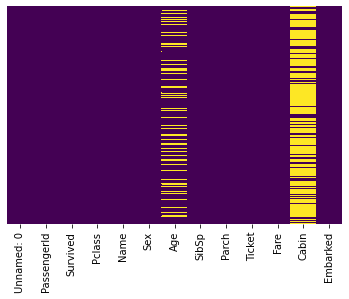

In [ ]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Kolom-kolom dengan data kosong adalah: Age, Cabin, Embarked

### Mengecek Outlier

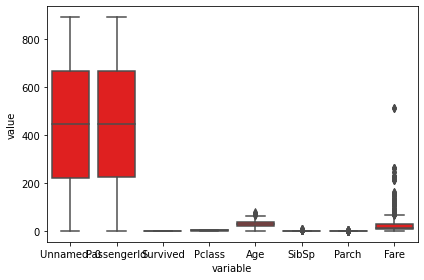

In [ ]:
df1=df.select_dtypes(include=['float64', 'int64']) #Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='red',orient='v', data=pd.melt(df1))
plt.tight_layout()


Kolom numeric yang memiliki outlier adalah Age, Sibsp, Parch, dan Fare

### Melihat Korelasi Data

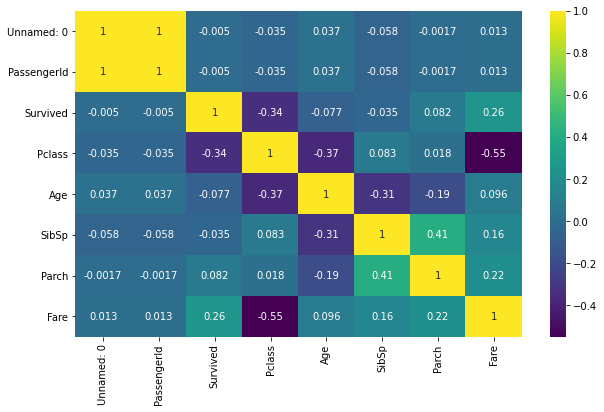

In [ ]:
k = len(df1.columns)
cm = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

### Melihat Statistik Data

In [ ]:
df.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Plot Distribusi Data Numerik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

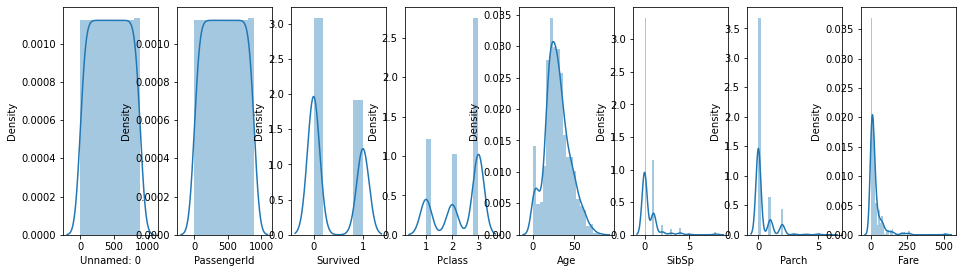

In [ ]:
l = df1.columns.values
number_of_columns=len(df1.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

Plot ini untuk melihat apakah variabel-variabel pada dataset berdistribusi normal. Variabel-variabel Age, SibSp, Parch, dan Fare cenderung memiliki skewnes positif. Itu berarti berarti ekor distribusi berada di sebelah kanan nilai terbanyak.

Apa itu Skewnes dan Kurtosis?
https://thomassoseco.blogspot.com/2019/02/skewness-dan-kurtosis.html

### Pairplot

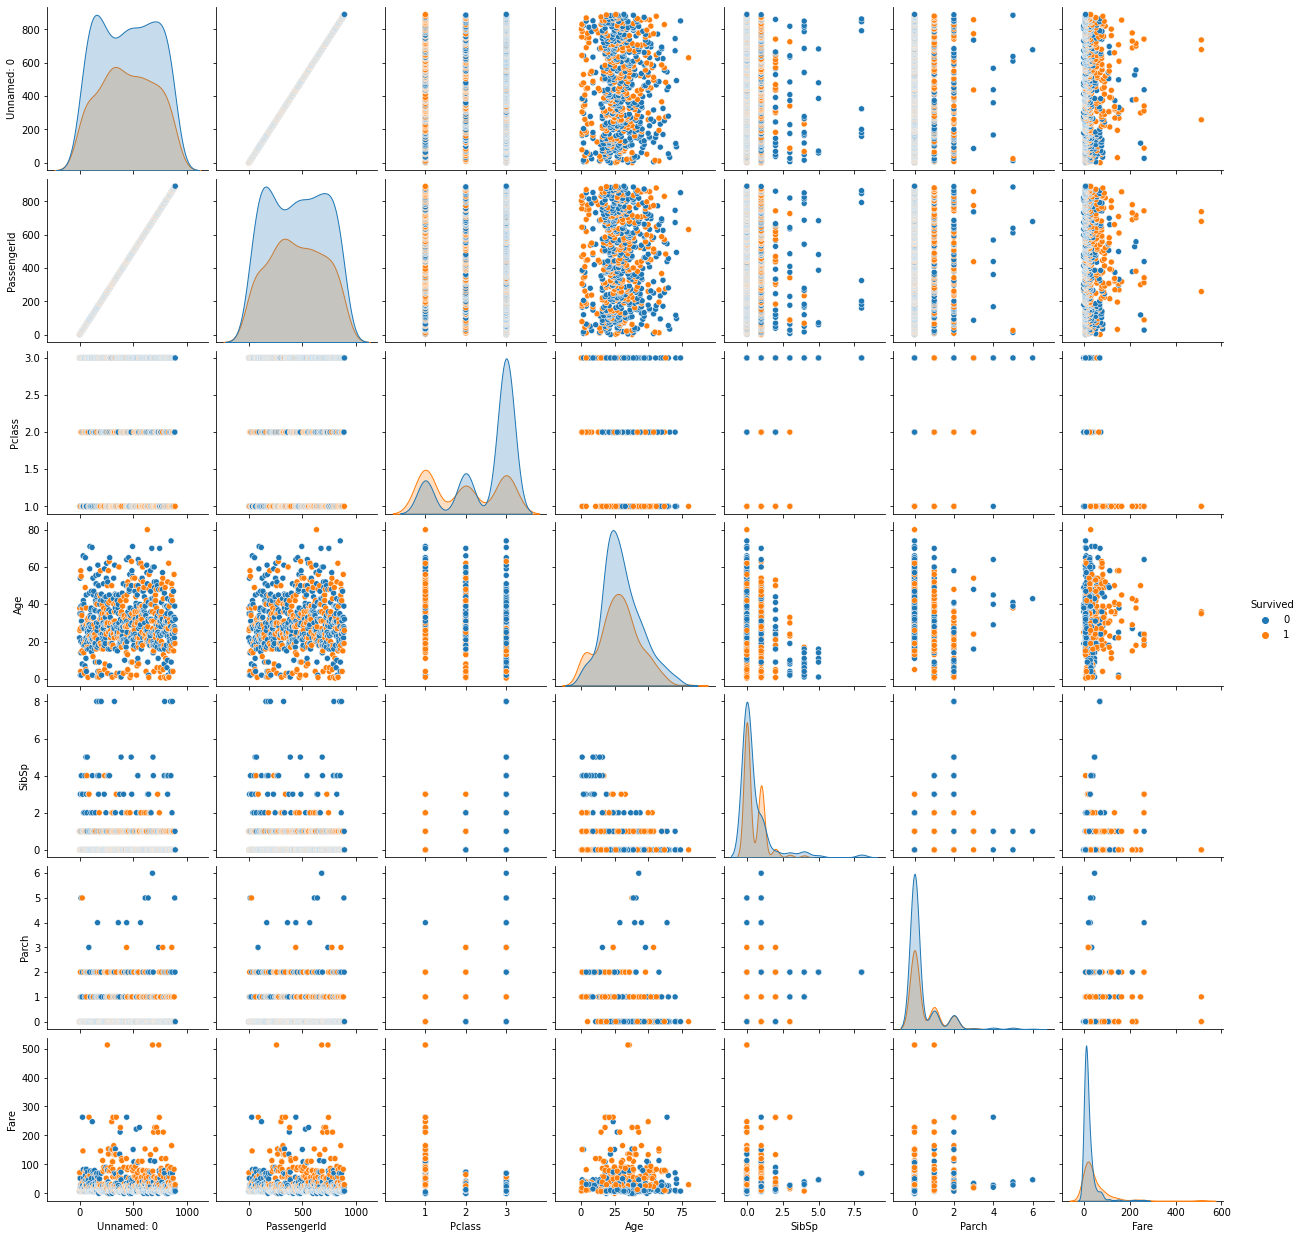

In [ ]:
g = sns.pairplot(df1, hue="Survived")

Plot ini untuk mengetahui plot untuk masing-masing pasangan data numerik

#**Data Preprocessing**

Data preprocessing ini digunakan guna menyiapkan data untuk diklasifikasi menggunakan metode SVM(Hanya Contoh).

Setelah mengetahui hasil EDA di atas maka untuk hasil yang baik diperlukan beberapa hal sebagai berikut:
1. Menghapus kolom teks yang tidak diperlukan: **Name** dan **Ticket**
2. Mengisi NaN pada kolom **Cabin** dengan salah satu nama kabin tertentu*, mengisi NaN pada kolom **Age **dengan nilai rata-ratanya
3. Melakukan pengkodean(Encoding) pada kolom **Sex** , **Cabin**, dan **Embarked**
4. Menghapus outlier
5. Karena nilai data ada yang sangat besar dan kecil maka perlu dilakukan normalisasi

Setelah data diperbaiki dilakukan langkah sebagai berikut:
1. Memilih variabel independent dan label
2. Membagi data menjadi data training dan data testing


[Note] * Ini hanya contoh untuk melakukan pengisian data NaN(Kosong), nama kabin mungkin menjadi penting sehingga tidak segampang itu diganti

### Seleksi Kolom

In [ ]:
df=df.drop(columns=['Name', 'Ticket'])
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,4,5,0,3,male,35.0,0,0,8.0500,NaN,S


### Mengisis NaN

In [ ]:
df['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F2             3
F33            3
              ..
A26            1
B80            1
C118           1
A36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
df['Cabin'] = df['Cabin'].replace(np.nan, "E49")
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,1,0,3,male,22.0,1,0,7.2500,E49,S
1,1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,2,3,1,3,female,26.0,0,0,7.9250,E49,S
3,3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,4,5,0,3,male,35.0,0,0,8.0500,E49,S


In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,1,0,3,male,22.0,1,0,7.2500,E49,S
1,1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,2,3,1,3,female,26.0,0,0,7.9250,E49,S
3,3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,4,5,0,3,male,35.0,0,0,8.0500,E49,S


In [ ]:
df[['Age','Cabin']].isnull().sum()

Age      0
Cabin    0
dtype: int64

### Melakukan Pengkodean(Encoding)

In [ ]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df['Cabin'].value_counts()

E49            688
C23 C25 C27      4
G6               4
B96 B98          4
F33              3
              ... 
C50              1
A26              1
B80              1
C118             1
C148             1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
#Encoding dengan data sedikit
cleanup_nums = {"Sex":     {"male": 1, "female": 2},
                "Embarked": {"S": 1, "C": 2, "Q": 3}}
df = df.replace(cleanup_nums)
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,1,0,3,1,22.0,1,0,7.2500,E49,1.0
1,1,2,1,1,2,38.0,1,0,71.2833,C85,2.0
2,2,3,1,3,2,26.0,0,0,7.9250,E49,1.0
3,3,4,1,1,2,35.0,1,0,53.1000,C123,1.0
4,4,5,0,3,1,35.0,0,0,8.0500,E49,1.0


In [ ]:
df["Cabin"] = df["Cabin"].astype('category')
df.dtypes

Unnamed: 0        int64
PassengerId       int64
Survived          int64
Pclass            int64
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Cabin          category
Embarked        float64
dtype: object

In [ ]:
#Encoding data dengan kategori sangat banyak
df["Cabin"] = df["Cabin"].cat.codes
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,1,0,3,1,22.0,1,0,7.2500,130,1.0
1,1,2,1,1,2,38.0,1,0,71.2833,81,2.0
2,2,3,1,3,2,26.0,0,0,7.9250,130,1.0
3,3,4,1,1,2,35.0,1,0,53.1000,55,1.0
4,4,5,0,3,1,35.0,0,0,8.0500,130,1.0


Referensi Encoding Lengkap:
https://pbpython.com/categorical-encoding.html

### Menghapus Outlier

Rentang interkuartil (IQR) adalah ukuran penyebaran statistik dan dihitung sebagai perbedaan antara persentil ke-75 dan ke-25. Ini diwakili oleh rumus IQR = Q3 - Q1. Baris kode di bawah menghitung dan mencetak kisaran interkuartil untuk setiap variabel dalam dataset.

Teknik ini menggunakan skor IQR yang dihitung sebelumnya untuk menghilangkan pencilan. Aturan praktisnya adalah bahwa segala sesuatu yang tidak berada dalam kisaran (Q1 - 1.5 IQR) dan (Q3 + 1.5 IQR) adalah pencilan, dan dapat dihapus.

Metode ini dipakai karena untuk identifikasi outlier awal digunakan metode boxplot.

Referensi: https://www.pluralsight.com/guides/cleaning-up-data-from-outliers

In [ ]:
#Menghitung Skor IQR
sorted(df)

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Unnamed: 0     445.0000
PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Sex              1.0000
Age             13.0000
SibSp            1.0000
Parch            0.0000
Fare            23.0896
Cabin            0.0000
Embarked         1.0000
dtype: float64


In [ ]:
#Menghapus Outlier
df_clear = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clear

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,1,0,3,1,22.000000,1,0,7.2500,130,1.0
2,2,3,1,3,2,26.000000,0,0,7.9250,130,1.0
4,4,5,0,3,1,35.000000,0,0,8.0500,130,1.0
5,5,6,0,3,1,29.699118,0,0,8.4583,130,3.0
9,9,10,1,2,2,14.000000,1,0,30.0708,130,2.0
...,...,...,...,...,...,...,...,...,...,...,...
882,882,883,0,3,2,22.000000,0,0,10.5167,130,1.0
883,883,884,0,2,1,28.000000,0,0,10.5000,130,1.0
884,884,885,0,3,1,25.000000,0,0,7.0500,130,1.0
886,886,887,0,2,1,27.000000,0,0,13.0000,130,1.0


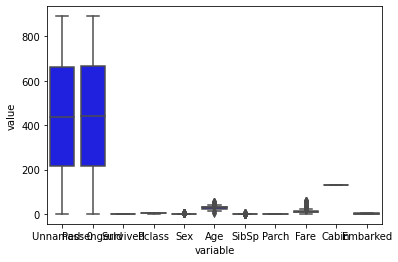

In [ ]:
#Melihat Outlier
sns.boxplot(x="variable", y="value", color='blue',orient='v', data=pd.melt(df_clear))

plt.show()

Outlier berhasil dihapus

### Normalisasi Data

Karena tujuannya adalah klasifikasi menggunakan SVM maka normalisasi data wajib dilakukan.

Lihat referensi: 
https://neerajkumar.org/writings/svm/#:~:text=SVMs%20assume%20that%20the%20data,the%20SVM%20is%20very%20important.&text=Some%20libraries%20recommend%20doing%20a,dimension%20to%200%20and%201.



In [ ]:
#Normalisasi data dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_clear), columns=df_clear.columns)

df_norm

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.000000,0.000000,0.0,1.0,0.0,0.346939,0.5,0.0,0.122054,0.0,0.0
1,0.002247,0.002247,1.0,1.0,1.0,0.428571,0.0,0.0,0.133418,0.0,0.0
2,0.004494,0.004494,0.0,1.0,0.0,0.612245,0.0,0.0,0.135522,0.0,0.0
3,0.005618,0.005618,0.0,1.0,0.0,0.504064,0.0,0.0,0.142396,0.0,1.0
4,0.010112,0.010112,1.0,0.5,1.0,0.183673,0.5,0.0,0.506242,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...
494,0.991011,0.991011,0.0,1.0,1.0,0.346939,0.0,0.0,0.177049,0.0,0.0
495,0.992135,0.992135,0.0,0.5,0.0,0.469388,0.0,0.0,0.176768,0.0,0.0
496,0.993258,0.993258,0.0,1.0,0.0,0.408163,0.0,0.0,0.118687,0.0,0.0
497,0.995506,0.995506,0.0,0.5,0.0,0.448980,0.0,0.0,0.218855,0.0,0.0


### Memilih Variable Target & Variabel Independent

In [ ]:
y=df_norm['Survived']
X=df_norm.drop(columns=['Survived'])

#Mengubah data menjadi array
y=np.array(y)
X=np.array(X)

print(y)
print(X)

[0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.

### Membagi Data Menjadi Data Training dan Data Testing

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y)

## **This is the end of Notebooks**


`Say: Alhamdulillah, panjang banget dah :)`


#**Referensi:**
https://nbviewer.jupyter.org/github/PBPatil/Exploratory_Data_Analysis-Wine_Quality_Dataset/blob/master/winequality_white.ipynb